## Importer les librairies

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Users\thiev\AppData\Local\Temp\ipykernel_4912\882836730.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../Data/Cleaned_Dataframe.csv',sep=';')


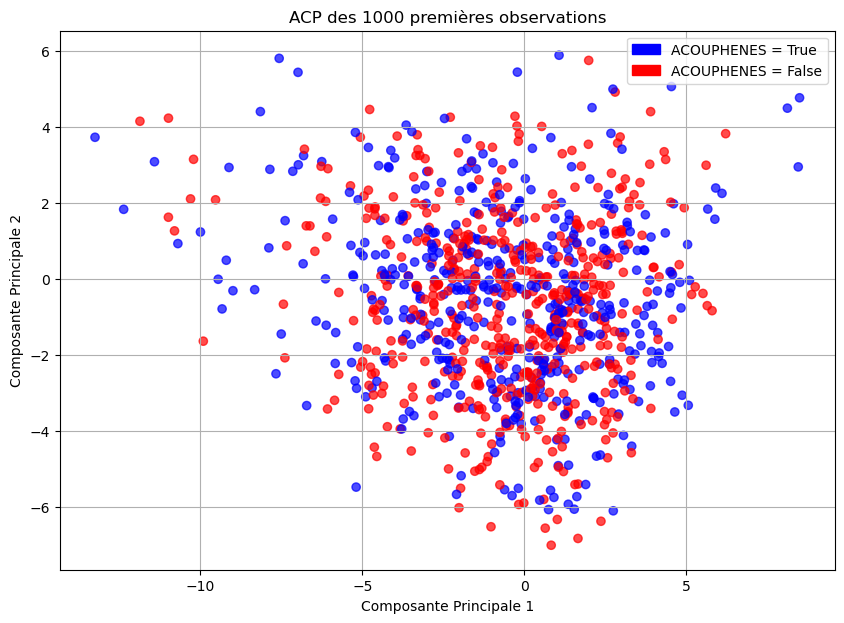

In [8]:
df = pd.read_csv('../../Data/Cleaned_Dataframe.csv',sep=';')
df = df.dropna()
X = df.drop(columns=['ACOUPHENES'])
X_numeric = X.select_dtypes(include=[np.number])

# 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# 3. Réalisation de l'ACP
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# 4. Préparation des données pour l'affichage des 1000 premières observations
n = min(1000, components.shape[0])
pc1 = components[:n, 0]
pc2 = components[:n, 1]
colors = ['blue' if val else 'red' for val in df['ACOUPHENES'].iloc[:n]]

# 5. Affichage
plt.figure(figsize=(10, 7))
plt.scatter(pc1, pc2, c=colors, alpha=0.7)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('ACP des 1000 premières observations')
# Légende personnalisée
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='ACOUPHENES = True')
red_patch = mpatches.Patch(color='red', label='ACOUPHENES = False')
plt.legend(handles=[blue_patch, red_patch])
plt.grid(True)
plt.show()
